## V5589 Sgr Brightness Temperature Work

In [1]:
#imports
import numpy as np
import pandas as pd
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_novas = (

["V392 Per",	3.40,    	0.78,			0.33,			"Gaia DR3 Parallax",			"2500 +/- 200",		"5500 +/- 300"],
["V1535 Sco",	7.79,	  	0.75,	        	0.69,			"Gaia DR3 Parallax",],
["V5589 Sgr",	8.04,		1.78,			1.35,			"Extinctions / Mass Model",					"4500 +/- 500"],
["RS Oph",		2.71,		0.2,			0.13,			"Gaia DR3 Parallax",],			
["V1534 Sco",	9.11,		2.14,			1.55,			"Extinctions/Colors/Mass Model",],
)

df_novas = pd.DataFrame(data_novas, columns = ['Nova', 'Distance', 'Distance Error (+)', 
                                               'Distance Error (-)', 'Distance Source', "V1(km/s)",		"V2(km/s)"])

df_novas

,Nova,Distance,Distance Error (+),Distance Error (-),Distance Source,V1(km/s),V2(km/s)
0,V392 Per,3.40,0.78,0.33,Gaia DR3 Parallax,2500 +/- 200,5500 +/- 300
1,V1535 Sco,7.79,0.75,0.69,Gaia DR3 Parallax,None,None
2,V5589 Sgr,8.04,1.78,1.35,Extinctions / Mass Model,4500 +/- 500,None
3,RS Oph,2.71,0.20,0.13,Gaia DR3 Parallax,None,None
4,V1534 Sco,9.11,2.14,1.55,Extinctions/Colors/Mass Model,None,None


In [3]:
#data split up by frequencies/
f1_35 = ([56526.7,	19,	1.26,	-0.571,	0.276,	1.00E-10,	0.05],
          [56441.4,	18,	1.26,	0.0811,	0.396,	1.00E-10,	0.05],
          [56347.7,	16,	1.26,	0.346,	0.503,	1.00E-10,	0.05],
         [56297.7,	15,	1.26,	0.0504,	0.102,	1.00E-10,	0.05],
         [56270.8,	13,	1.2555,	0,	0.083,	1.00E-10,	0.05],
         [56177.9,	11,	1.33,	0.225,	0.044,	1.00E-10,	0.05],
         [56167.0,	9,	1.36,	0.244,	0.049,	1.00E-10,	0.05],
          [56151.3,	8,	1.25,	0,	0.091,	1.00E-10,	0.05],
         [56148.0,	7,	1.2555,	0.340,	0.071,	1.00E-10,	0.05],
         [56119.1,	5,	1.35,	1.68,	0.120,	1.00E-10,	0.05],
        )

f1_78 = ([56526.7,	19,	1.74,	-0.348,	0.169,	1.00E-10,	0.05],
         [56441.4,	18,	1.74,	-0.202,	0.326,	1.00E-10,	0.05],
         [56347.7,	16,	1.74,	-0.0272,	0.368,	1.00E-10,	0.05],
         [56297.7,	15,	1.74,	-0.00249,	0.068,	1.00E-10,	0.05],
         [56270.8,	13,	1.7395,	0,	0.084,	1.00E-10,	0.05],
         [56177.9,	11,	1.77,	0.201,	0.042,	1.00E-10,	0.05],
         [56167.0,	9,	1.78,	0.431,	0.048,	1.00E-10,	0.05],
         [56151.3,	8,	1.80,	0.497,	0.088,	1.00E-10,	0.05],
         [56148.0,	7,	1.7715,	0.560,	0.072,	1.00E-10,	0.05],
         [56119.1,	5,	1.84,	1.391,	0.066,	1.00E-10,	0.05],
        )

f3 = ([56100.3,	4,	2.5,	3.094,	0.037,	1.00E-10,	0.05],
        [56100.3,	4,	3.5,	3.201,	0.030,	1.00E-10,	0.05],)

f4_74 = ( [56526.7,	19,	4.55,	-0.00306,	0.028,	1.00E-10,	0.05],
         [56347.7,	16,	4.55,	-0.232,	0.114,	1.00E-10,	0.05],
         [56297.7,	15,	4.55,	0.0328,	0.033,	1.00E-10,	0.05],
         [56270.8,	13,	4.549,	0,	0.021,	1.00E-10,	0.05],
         [56167.0,	9,	4.608,	0.347,	0.028,	1.00E-10,	0.05],
         [56151.3,	8,	4.549,	0.502,	0.034,	1.00E-10,	0.05],
         [56148.0,	7,	4.74,	0.521,	0.033,	1.00E-10,	0.05],
         [56119.1,	5,	4.74,	1.907,	0.027,	1.00E-10,	0.05],
         [56100.3,	4,	5,	3.423,	0.023,	1.00E-10,	0.05],
         [56084.4,	2,	5,	1.089,	0.028,	1.00E-10,	0.05],
        )

f7_46 = ([56526.7,	19,	7.40,	-0.0045,	0.019,	1.00E-10,	0.05],
          [56441.4,	18,	7.399,	-0.0098,	0.021,	1.00E-10,	0.05],
         [56441.4,	18,	4.55,	0.0437,	0.033,	1.00E-10,	0.05],
          [56347.7,	16,	7.399,	-0.00948,	0.160,	1.00E-10,	0.05],
         [56297.7,	15,	7.399,	0.0288,	0.023,	1.00E-10,	0.05],
         [56270.8,	13,	7.399,	0,	0.016,	1.00E-10,	0.05],
         [56167.0,	9,	7.458,	0.292,	0.016,	1.00E-10,	0.05],
         [56151.3,	8,	7.399,	0.469,	0.025,	1.00E-10,	0.05],
        [56148.0,	7,	7.59,	0.528,	0.025,	1.00E-10,	0.05],
         [56119.1,	5,	7.59,	1.921,	0.023,	1.00E-10,	0.05],
         [56100.3,	4,	6.8,	3.629,	0.025,	1.00E-10,	0.05],
         [56084.4,	2,	6.8,	1.381,	0.025,	1.00E-10,	0.05],
        )

f8_51 = ([56526.7,	19,	8.52,	0.00449,	0.022,	1.00E-10,	0.05],
         [56441.4,	18,	8.52,	-0.00263,	0.018,	1.00E-10,	0.05],
         [56347.7,	16,	8.52,	0.465,	0.201,	1.00E-10,	0.05],
         [56297.7,	15,	8.52,	0.0286,	0.018,	1.00E-10,	0.05],
         [56270.8,	13,	8.519,	0,	0.025,	1.00E-10,	0.05],
         [56167.0,	9,	8.5,	0.289,	0.018,	1.00E-10,	0.05],
         [56151.3,	8,	8.51,	0.443,	0.021,	1.00E-10,	0.05],
         [56148.0,	7,	8.53,	0.556,	0.031,	1.00E-10,	0.05],
         [56100.3,	4,	8.5,	3.683,	0.052,	1.00E-10,	0.05],
        )

f11_38 = ( [56526.7,	19,	11.4,	-0.0051,	0.024,	1.00E-10,	0.05],
          [56441.4,	18,	11.4,	-0.0266,	0.019,	1.00E-10,	0.05],
          [56347.7,	16,	11.4,	-0.0358,	0.301,	1.00E-10,	0.05],
           [56297.7,	15,	11.4,	0.0413,	0.023,	1.00E-10,	0.05],
          [56270.8,	13,	11.399,	0,	0.030,	1.00E-10,	0.05],
          [56167.0,	9,	11.4,	0.368,	0.031,	1.00E-10,	0.05],
          [56151.3,	8,	11.34,	0.418,	0.035,	1.00E-10,	0.05],
          [56148.0,	7,	11.38,	0.571,	0.060,	1.00E-10,	0.05],
          [56100.3,	4,	11.4,	3.779,	0.071,	1.00E-10,	0.05],
         )

f13_3 = ([56530.7,	19,	13.3,	-0.00734,	0.031,	1.00E-10,	0.05],
         [56446.2,	18,	13.3,	-0.0169,	0.024,	1.00E-10,	0.05],
         [56369.6,	17,	13.3,	-0.0319,	0.023,	1.00E-10,	0.05],
         [56358.6,	17,	13.22,	0.025,	0.027,	1.00E-10,	0.05],
         [56284.6,	14,	13.30,	0.047,	0.022,	1.00E-10,	0.05],
         [56284.6,	14,	13.299,	0,	0.029,	1.00E-10,	0.05],
         [56231.0,	12,	13.3,	0.035,	0.021,	1.00E-10,	0.05],
         [56174.2,	10,	13.3,	0.188,	0.019,	1.00E-10,	0.05],
         [56150.2,	8,	13.3,	0.495,	0.042,	1.00E-10,	0.05],
         [56092.2,	3,	13.3,	3.523,	0.042,	1.00E-10,	0.05],
        )

f17_45 = ([56530.7,	19,	17.4,	-0.00912,	0.053,	1.00E-10,	0.05],
          [56446.2,	18,	17.4,	0.0260,	0.029,	1.00E-10,	0.05],
          [56369.6,	17,	17.4,	0.0240,	0.029,	1.00E-10,	0.05],
          [56358.6,	17,	17.45,	0.009,	0.025,	1.00E-10,	0.05],
          [56284.6,	14,	17.45,	0.049,	0.026,	1.00E-10,	0.05],
          [56284.6,	14,	17.449,	0,	0.035,	1.00E-10,	0.05],
          [56231.0,	12,	17.4,	0.043,	0.027,	1.00E-10,	0.05],
          [56174.2,	10,	17.45,	0.110,	0.029,	1.00E-10,	0.05],
          [56150.2,	8,	17.45,	0.38,	0.049,	1.00E-10,	0.05],
          [56128.3,	6,	17.5,	1.374,	0.091,	1.00E-10,	0.05],
          [56092.2,	3,	16,	3.98,	0.049,	1.00E-10,	0.05],
         )

f28_2 = ([56530.7,	19,	27.5,	0.0271,	0.011,	1.00E-10,	0.05],
         [56446.2,	18,	27.5,	0.112,	0.077,	1.00E-10,	0.05],
         [56369.6,	17,	27.5,	0.113,	0.065,	1.00E-10,	0.05],
         [56358.6,	17,	27.50,	0.046,	0.049,	1.00E-10,	0.05],
         [56284.6,	14,	27.50,	0.036,	0.050,	1.00E-10,	0.05],
         [56231.0,	12,	27.5,	0.060,	0.044,	1.00E-10,	0.05],
         [56174.2,	10,	27.5,	0.106,	0.027,	1.00E-10,	0.05],
         [56150.2,	8,	27.5,	0.469,	0.078,	1.00E-10,	0.05],
         [56128.3,	6,	27.5,	1.438,	0.143,	1.00E-10,	0.05],
         [56092.2,	3,	28.2,	5.727,	0.098,	1.00E-10,	0.05],
        )

f36_5 = ([56530.7,	19,	36.5,	0.110,	0.110,	1.00E-10,	0.05],
         [56446.2,	18,	36.5,	-0.0663,	0.095,	1.00E-10,	0.05],
         [56369.6,	17,	36.5,	0.0109,	0.083,	1.00E-10,	0.05],
         [56358.6,	17,	36.50,	0.120,	0.062,	1.00E-10,	0.05],
         [56284.6,	14,	36.50,	0.020,	0.068,	1.00E-10,	0.05],
         [56231.0,	12,	36.5,	0.044,	0.052,	1.00E-10,	0.05],
         [56174.2,	10,	36.5,	0.365,	0.131,	1.00E-10,	0.05],
         [56150.2,	8,	36.5,	0.39,	0.086,	1.00E-10,	0.05],
         [56128.3,	6,	36.5,	1.136,	0.194,	1.00E-10,	0.05],
         [56092.2,	3,	36.5,	5.961,	0.139,	1.00E-10,	0.05],
         [56040.4,	1,	33,	0.032,	0.025,	1.00E-10,	0.05],
        )

In [4]:
df1_35 =  pd.DataFrame(f1_35, columns = ["MJD",	"Epoch", "Freq", "Flux", "error","RM", "systematics"])

df1_78 =  pd.DataFrame(f1_78, columns = ["MJD",	"Epoch", "Freq", "Flux", "error","RM", "systematics"])

df3 =  pd.DataFrame(f3, columns = ["MJD",	"Epoch", "Freq", "Flux", "error","RM", "systematics"])

df4_74 =  pd.DataFrame(f4_74, columns = ["MJD",	"Epoch", "Freq", "Flux", "error","RM", "systematics"])

df7_46 =  pd.DataFrame(f7_46, columns = ["MJD",	"Epoch", "Freq", "Flux", "error","RM", "systematics"])

df8_51 =  pd.DataFrame(f8_51, columns = ["MJD",	"Epoch", "Freq", "Flux", "error","RM", "systematics"])

df11_38 =  pd.DataFrame(f11_38, columns = ["MJD",	"Epoch", "Freq", "Flux", "error","RM", "systematics"])

df13_3 =  pd.DataFrame(f13_3, columns = ["MJD",	"Epoch", "Freq", "Flux", "error","RM", "systematics"])

df17_45 =  pd.DataFrame(f17_45, columns = ["MJD",	"Epoch", "Freq", "Flux", "error","RM", "systematics"])

df28_2 =  pd.DataFrame(f28_2, columns = ["MJD",	"Epoch", "Freq", "Flux", "error","RM", "systematics"])

df36_5 =  pd.DataFrame(f36_5, columns = ["MJD",	"Epoch", "Freq", "Flux", "error","RM", "systematics"])

In [5]:
mask1 = df1_78['Flux'] > 3 * np.sqrt(df1_78["error"]**2 + (df1_78["Flux"]*0.05)**2) #don't show the non-detections
if mask1.any():
        days1_78 = (df1_78['MJD'][mask1] - 56038)
        flux1_78 = df1_78["Flux"][mask1]
        flux_err1_78 = np.sqrt(df1_78["error"][mask1]**2 + (df1_78["Flux"][mask1]*0.05)**2)

mask2 = df7_46['Flux'] > 3 * np.sqrt(df7_46["error"]**2 + (df7_46["Flux"]*0.05)**2) #don't show the non-detections
if mask2.any():
        days7_46 = (df7_46['MJD'][mask2] - 56038)
        flux7_46 = df7_46["Flux"][mask2]
        flux_err7_46 = np.sqrt(df7_46["error"][mask2]**2 + (df7_46["Flux"][mask2]*0.05)**2)

mask3 = df11_38['Flux'] > 3 * np.sqrt(df11_38["error"]**2 + (df11_38["Flux"]*0.1)**2) #don't show the non-detections
if mask3.any():
        days11_38 = (df11_38['MJD'][mask3] - 56038)
        flux11_38 = df11_38["Flux"][mask3]
        flux_err11_38 = np.sqrt(df11_38["error"][mask3]**2 + (df11_38["Flux"][mask3]*0.1)**2)

mask4 = df17_45['Flux'] > 3 * np.sqrt(df17_45["error"]**2 + (df17_45["Flux"]*0.1)**2) #don't show the non-detections
if mask4.any():
        days17_45 = (df17_45['MJD'][mask4] - 56038)
        flux17_45 = df17_45["Flux"][mask4] 
        flux_err17_45 = np.sqrt(df17_45["error"][mask4]**2 + (df17_45["Flux"][mask4]*0.1)**2)

mask5 = df28_2['Flux'] > 3 * np.sqrt(df28_2["error"]**2 + (df28_2["Flux"]*0.1)**2) #don't show the non-detections
if mask5.any():
        days28_2 = (df28_2['MJD'][mask5] - 56038)
        flux28_2 = df28_2["Flux"][mask5]
        flux_err28_2 = np.sqrt(df28_2["error"][mask5]**2 + (df28_2["Flux"][mask5]*0.1)**2)

In [6]:

Dist =  8.04 * 3.086*10**21                 #distance in cm
V_const =  4500* 100000        #velocity in cm/s


def Con_TB(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(V_const * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Dist)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)
        

In [7]:
nu0 = 1.78 #FREQUENCY 1
nu1 = 7.46 #frequency 2
nu2 = 11.38 #frequency 3
nu3 = 17.45
nu4 = 28.2 #frequency 5

date_CAC_sec_n0 = days1_78 * 86400    #time in seconds  (date_CAC is going to be a list of times (from t0))
date_CAC_sec_n1 = days7_46 * 86400    #time in seconds 
date_CAC_sec_n2 = days11_38 * 86400    #time in seconds 
date_CAC_sec_n3 = days17_45 * 86400
date_CAC_sec_n4 = days28_2 * 86400

In [8]:
CTB_nu0, CTBError_nu0 = Con_TB(flux1_78, date_CAC_sec_n0, flux_err1_78, nu0)

CTB_nu0

[13696.275750011988,
 34541.38220650879,
 51634.316408880986,
 61722.643693729195,
 282050.76649781235]

In [9]:
CTB_nu1, CTBError_nu1 = Con_TB(flux7_46, date_CAC_sec_n1, flux_err7_46, nu1)

CTB_nu1

[1332.3172265300195,
 2774.068848092848,
 3313.238998757567,
 22176.339867369254,
 70992.9278192039,
 48703.69710975728]

In [10]:
CTB_nu2, CTBError_nu2 = Con_TB(flux11_38, date_CAC_sec_n2, flux_err11_38, nu2)

CTB_nu2

[721.5488540743862, 1062.4629767158951, 1539.7424426096413, 31768.60478087011]

In [11]:
CTB_nu3, CTBError_nu3 = Con_TB(flux17_45, date_CAC_sec_n3, flux_err17_45, nu3)

CTB_nu3

[82.28666758039986, 418.8792888311924, 2338.310807009941, 18800.764253575235]

In [12]:
CTB_nu4, CTBError_nu4 = Con_TB(flux28_2, date_CAC_sec_n4, flux_err28_2, nu4)

CTB_nu4

[30.36234430611542, 197.95696173016668, 937.0592155819858, 10358.867087048222]

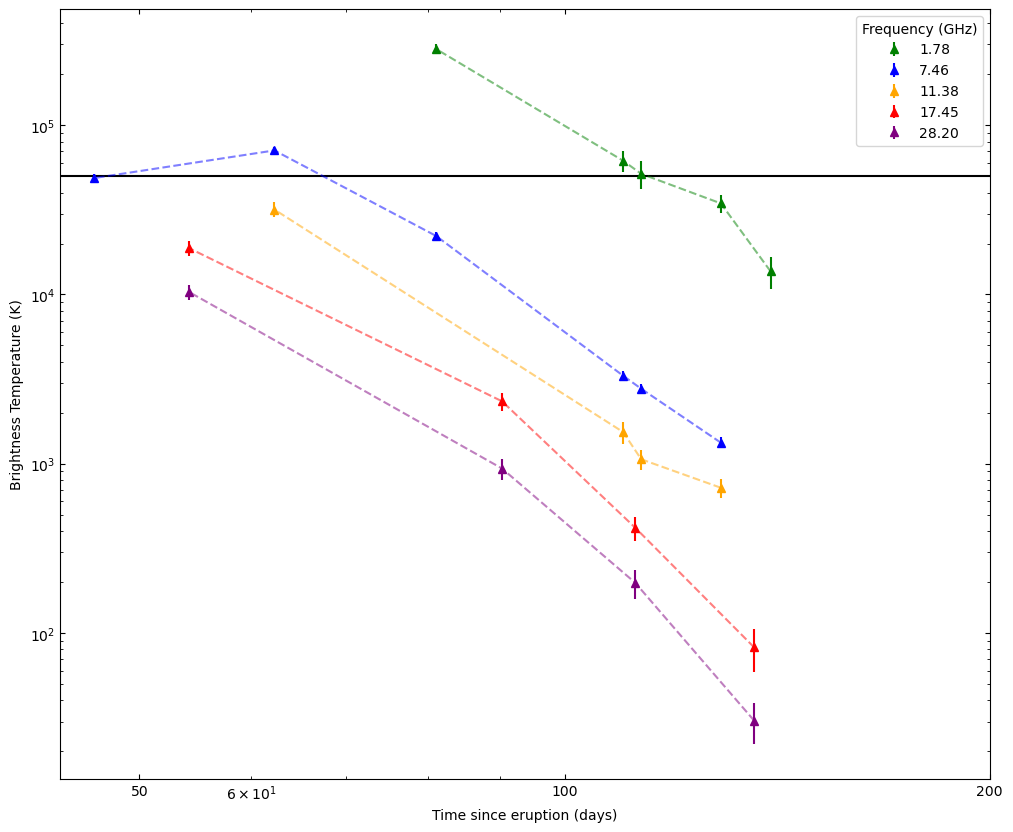

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)

ax.axhline(y=5*10**4, color='black', linestyle='-', linewidth=1.5)

used_labels = set()

def plot(days, CTBs, CTBerrors, fluxes, errors, color, label_name):
    for day, CTB, CTBerr, flux, err in zip(days, CTBs, CTBerrors, fluxes, errors):
        if flux < 3 * err:
            fmt = 'x'  # square for non-detection
            
            
            label = None  # no label for non-detections
            #ax.errorbar(day, CTB, fmt=fmt, color=color, label=label)
            
        else:
            fmt = '^'  # triangle for detection
            label = label_name if label_name not in used_labels else None
        
            ax.errorbar(day, CTB, yerr=CTBerr, fmt=fmt, color=color, label=label)
        
        if label:
            used_labels.add(label)


plot(days1_78, CTB_nu0, CTBError_nu0, flux1_78, flux_err1_78, 'green', '1.78')
ax.plot(days1_78[0:10], CTB_nu0[0:10], color='green', linestyle = '--', alpha=.50)

plot(days7_46, CTB_nu1, CTBError_nu1, flux7_46, flux_err7_46, 'blue', '7.46')
ax.plot(days7_46[0:12], CTB_nu1[0:12], color='blue', linestyle = '--', alpha=.50)

plot(days11_38, CTB_nu2, CTBError_nu2, flux11_38, flux_err11_38, 'orange', '11.38')
ax.plot(days11_38[0:10], CTB_nu2[0:10], color='orange', linestyle = '--', alpha=.50)

plot(days17_45, CTB_nu3, CTBError_nu3, flux17_45, flux_err17_45, 'red', '17.45')
ax.plot(days17_45[0:11], CTB_nu3[0:11], color='red', linestyle = '--', alpha=.50)

plot(days28_2, CTB_nu4, CTBError_nu4, flux28_2, flux_err28_2, 'purple', '28.20')
ax.plot(days28_2[0:11], CTB_nu4[0:11], color='purple', linestyle = '--', alpha=.50)

"""
ax.errorbar(days1_78, CTB_nu0, yerr=CTBError_nu0, fmt='^', color='green', label='1.78')
ax.plot(days1_78, CTB_nu0, color='green', linestyle = '--', alpha=.50)

ax.errorbar(days7_46, CTB_nu1, yerr=CTBError_nu1, fmt='^', color='blue', label='7.46')
ax.plot(days7_46, CTB_nu1, color='blue', linestyle = '--', alpha=.50)

ax.errorbar(days11_38, CTB_nu2, yerr=CTBError_nu2, fmt='^', color='orange', label='11.38')
ax.plot(days11_38, CTB_nu2, color='orange', linestyle = '--', alpha=.50)


ax.errorbar(days17_45, CTB_nu3, yerr=CTBError_nu3, fmt='^', color='hotpink', label='17.45')
ax.plot(days17_45, CTB_nu3, color='hotpink', linestyle = '--', alpha=.50)


ax.errorbar(days28_2, CTB_nu4, yerr=CTBError_nu4, fmt='^', color='red', label='28.2')
ax.plot(days28_2, CTB_nu4, color='red', linestyle = '--', alpha=.50)

"""


ax.set_xscale('log')
ax.set_xticks([50,100,200], labels = ['50','100','200'])
ax.set_yscale('log')
#ax.set_yticks([.1,1,10], labels = ['0.1','1.0','10.0'])
ax.set_xlabel("Time since eruption (days)")
ax.set_ylabel("Brightness Temperature (K)")


ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.set_title("")
plt.legend(title='Frequency (GHz)')
plt.show();

In [14]:
mask = df1_35['Flux'] > 3 * np.sqrt(df1_35["error"]**2 + (df1_35["Flux"]*0.05)**2) #don't show the non-detections
if mask.any():
        days1_35 = (df1_35['MJD'][mask] - 56038)
        flux1_35 = df1_35["Flux"][mask]
        flux_err1_35 = np.sqrt(df1_35["error"][mask]**2 + (df1_35["Flux"][mask]*0.05)**2)


nu1_35 = 1.35
date_CAC_sec_n1_35 = days1_35 * 86400    #time in seconds  (date_CAC is going to be a list of times (from t0))

In [15]:
Vlow = 4000 * 100000
Vhigh = 5000 * 100000
Distlow = 6.69 *  3.086*10**21 
Disthigh = 9.82 *  3.086*10**21 

In [16]:
def Con_TBlow(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(Vhigh * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Distlow)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)



def Con_TBhigh(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(Vlow * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Disthigh)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)

In [17]:
CTB_nuhigh, CTBError_nuhigh = Con_TBhigh(flux1_35, date_CAC_sec_n1_35, flux_err1_35, nu1_35)
print(CTB_nuhigh)

[50324.25362558629, 64186.05132688815, 123005.29306477895, 1118144.228963218]


In [18]:
CTB_nulow, CTBError_nulow = Con_TBlow(flux1_35, date_CAC_sec_n1_35, flux_err1_35, nu1_35)
print(CTB_nulow)

[14948.120027324276, 19065.574354122225, 36537.0125190226, 332129.20089696447]


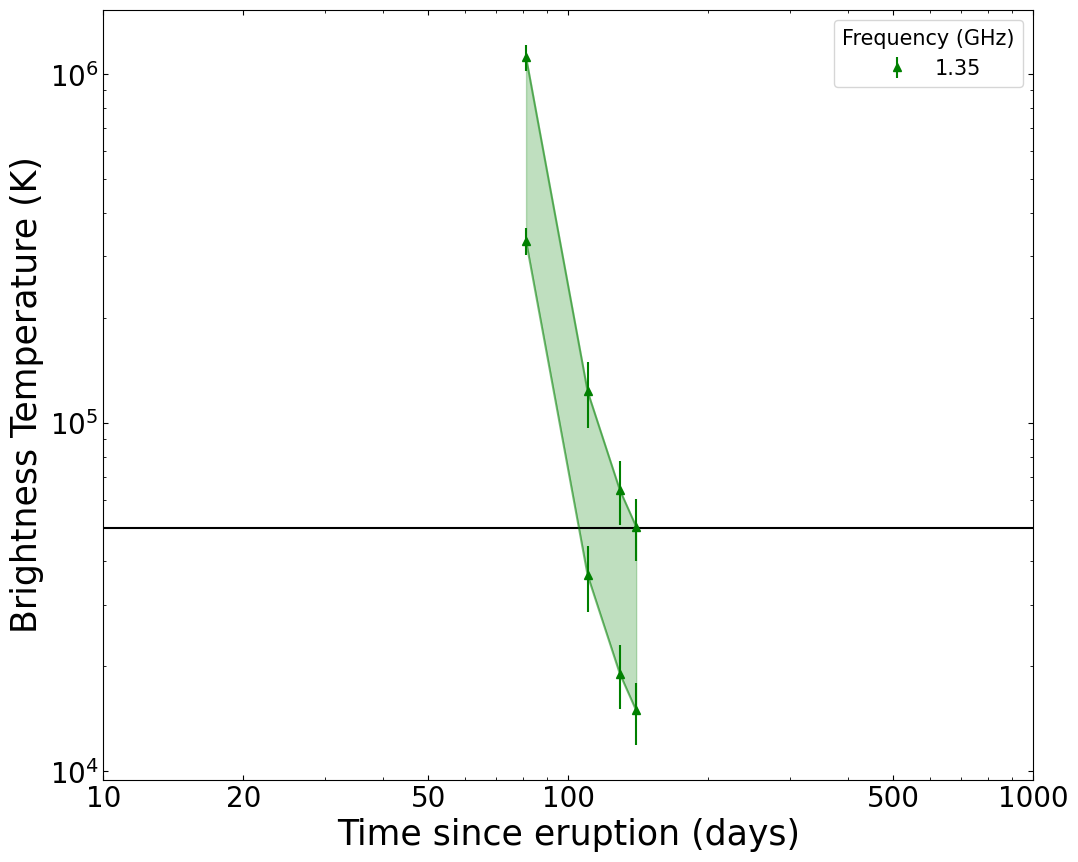

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)

ax.axhline(y=5*10**4, color='black', linestyle='-', linewidth=1.5)

#using a function to plot the detections only
# Store which labels have already been used
used_labels = set()

def plot(days, CTBs, CTBerrors, fluxes, errors, color, label_name):
    for day, CTB, CTBerr, flux, err in zip(days, CTBs, CTBerrors, fluxes, errors):
        if flux < 3 * err:
            fmt = 'x'  # square for non-detection
            label = None  # no label for non-detections
            ax.errorbar(day, CTB, fmt=fmt, color=color, label=label)
            
        else:
            fmt = '^'  # triangle for detection
            label = label_name if label_name not in used_labels else None
        
            ax.errorbar(day, CTB, yerr=CTBerr, fmt=fmt, color=color, label=label)
        
        if label:
            used_labels.add(label)


plot(days1_35, CTB_nuhigh, CTBError_nuhigh, flux1_35, flux_err1_35,'green', '1.35')
ax.plot(days1_35[0:27], CTB_nuhigh[0:27], color='green', linestyle = '-', alpha=.50)

plot(days1_35, CTB_nulow, CTBError_nulow, flux1_35, flux_err1_35,'green', '1.35')
ax.plot(days1_35[0:27], CTB_nulow[0:27], color='green', linestyle = '-', alpha=.50)

ax.fill_between(days1_35, CTB_nulow, CTB_nuhigh, alpha=.25, color='green')


ax.set_xscale('log')
ax.set_xticks([10,20,50,100,500,1000], labels = ['10','20','50','100','500', '1000'], fontsize=20)
ax.set_yscale('log')
ax.set_yticks([ 10000, 100000, 1000000], labels = [ r'$10^{4}$', r'$10^{5}$', r'$10^{6}$'],fontsize=20)
ax.set_xlabel("Time since eruption (days)", fontsize = 25)
ax.set_ylabel("Brightness Temperature (K)", fontsize = 25)


ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.set_title("")
plt.legend(title='Frequency (GHz)', title_fontsize=15, fontsize=15)
plt.show();